## SVM implementation through CRNs
The notebook is meant to contain the code implementation of Linear Hard Margin SVMs through CRNs. We shall be utilising various properties like dual-rail encoding, oscillator molecules, approximate majority .etc. to accomplish this.

### Sections 
- Implementation of Linear Hard Margin SVMs
- Making modules to do Linear Hard Margin SVMs

### Implemetation of Linear Hard Margin SVMs

The theory behind SVMs:

[Link to resource](https://www.python-engineer.com/courses/mlfromscratch/07_svm/)

[Another link](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

Cost of just prediction

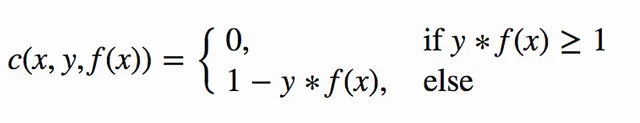

Total cost function

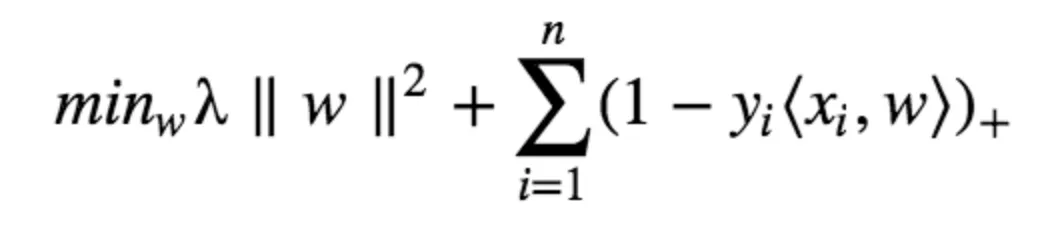


Splitting the cost function in 2 parts. First part derivative is same for both and as follows as for second part. For correctly classified, its 0, otherwise other one.

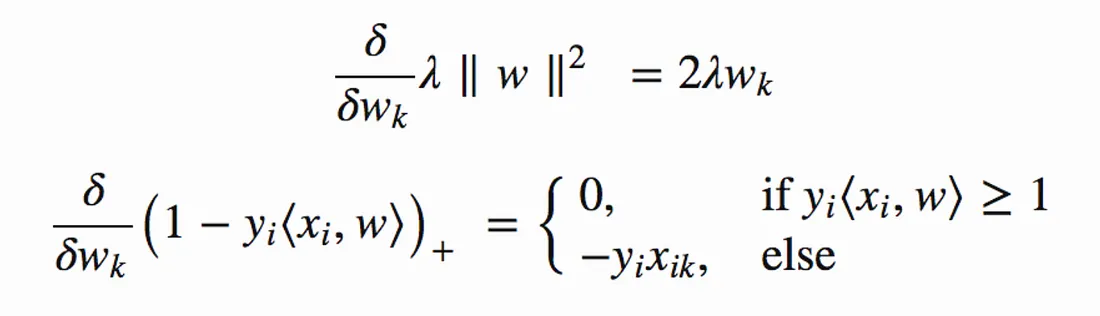


Update for Correctly classified. No update needed for bias in correctly classified (as derivative wrt to b is 0)

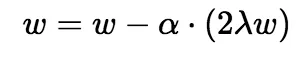

Update for Incorrectly classified.

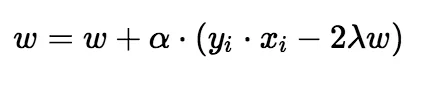

Bias not included in above. If included i.e. wX+b , 
- in correctly classified no update as derivative wrt to b is 0
- in incorrectly classified is simply derivative as belows

Normal Python Implementation

In [589]:
import numpy as np

class SVM():
    def __init__(self, lr = 0.001, epochs = 10000):
        self.w = None
        self.b = None
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i, x in enumerate(X):
                if y[i] * (np.dot(x, self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * 1/self.epochs * self.w)
                else:
                    self.w -= self.lr * (2 * 1/self.epochs * self.w - np.dot(x, y[i]))
                    self.b -= self.lr * y[i]
    
    def show(self):
        print(self.w, self.b)
    
    def loss(self, X, y):
        return 1/2 * np.dot(self.w, self.w) + 1/self.epochs * np.sum(np.maximum(0, 1 - y * (np.dot(X, self.w) - self.b)))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

In [590]:
case = 5.1
X = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
y = np.array([-1, 1, 1, -1, 1, -1])

# case = 2.1
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

In [591]:
# generating a dataset
np.random.seed(0)
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

# X = np.array([[8, 7], [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3]])
# y = np.array([-1, 1, 1, -1, 1, -1])


# training the model
clf = SVM()
clf.train(X, y)

# testing the model
clf.show()

# showing the model
clf.show()

# showing the loss
# print(clf.loss(X, y)) # 0.0

[ 0.20447709 -0.16805409] -0.11100000000000008
[ 0.20447709 -0.16805409] -0.11100000000000008


### Making modules to do Linear Hard Margin SVMs

In [592]:
# making the dataset for train ( same as above )
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

# X = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
# y = np.array([-1, 1, 1, -1, 1, -1])

# X = np.array([[ 2.79645568 ,-2.57295036], [ 1.12243021  ,0.93398757], [ 3.18808289  ,2.61963895], [ 1.64835565, -2.32791661], [ 1.94409439 ,-1.84668899], [ 2.57635389 , 1.7062792 ], [ 0.12287088 ,-0.28360002], [ 2.94053665 ,-3.18556768], [ 1.38852774,  0.61337249]])
# y = np.array([-1 , 1,  1, -1, -1,  1, -1 ,-1,  1])

# idx = len(X)
# X = X[0:idx+1]
# y = y[0:idx+1]
# print(X)
# print(y)

In [593]:
def dual_rail_encoding_arr(x):
    x_p = []
    x_n = []
    for i in x:
        p = []
        n = []

        for j in i:
            if j > 0:
                p.append(j)
                n.append(0)
            else:
                p.append(0)
                n.append(-j)
        x_p.append(p)
        x_n.append(n)
    return x_p, x_n

def dual_rail_encoding_num(x):
    x_p = []
    x_n = []

    for i in x:
        if i > 0:
            x_p.append(i)
            x_n.append(0)
        else:
            x_p.append(0)
            x_n.append(-i)
    return x_p, x_n


In [594]:
X_p, X_n = dual_rail_encoding_arr(X)
Y_p, Y_n = dual_rail_encoding_num(y)
print(X_p, X_n)
print(Y_p, Y_n)

[[1, 8], [3, 8], [5, 1], [0, 0], [7, 3], [8, 7]] [[0, 0], [0, 0], [0, 0], [6, 1], [0, 0], [0, 0]]
[0, 1, 1, 0, 1, 0] [1, 0, 0, 1, 0, 1]


In [595]:

epochs = 1000
lr = 0.0001 # lr * epochs >=1
time_step =100

In [596]:
from scipy.integrate import odeint

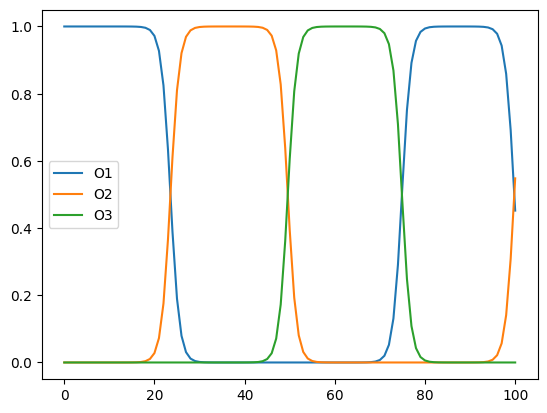

In [597]:
def osciallation(num_species, time_Duration = 100):
    O_t = np.zeros(num_species)
    O_t[0] = 1
    t = np.linspace(0, time_Duration, time_Duration+1)
    dope = 10 ** (-11)
    d_o_T = np.ones(num_species) * dope

    def doped_model(O_t, t,  d_o_T):
        dO_t = np.zeros(num_species)
        dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
        for i in range(1, num_species-1):
            dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
        dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        return dO_t
    
    O = odeint(doped_model, O_t, t, args=(d_o_T,))
    return O


sol = osciallation(3)

# plotting the solution 
import matplotlib.pyplot as plt
plt.plot(sol)
plt.legend(['O1', 'O2', 'O3'])
plt.show()

In [598]:
# laoding function
def load_f(y,t,a):
    c = y[0]
    dc_dt = -c + a
    return [ dc_dt]

def load_wrapper(a, c, time_start):
    y0 = [c]
    # print(a)
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(load_f, y0, t, args=(a,))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [599]:
# multiplication function
def product_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a*b
    return [ dc_dt]

def product_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(product_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [600]:
# sum
def sum_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a + b
    return [ dc_dt]

def sum_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(sum_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [601]:
# division
def div_f(y,t,a,b):
    c = y[0]
    dc_dt = a - b*c
    return [ dc_dt]

def div_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(div_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [602]:
# comparison
def comparison_f(y, t, a, b):
    dydt = []
    bgta = y[0]
    blta = y[1]

    temp = b*blta - bgta*a
    dydt.append(temp)

    temp = bgta*a - b*blta
    dydt.append(temp)

    return dydt

def Approx_majority (y, t):
    kgtq = y[0]
    kltq = y[1]
    b_help = y[2]

    dydt = []
    
    temp =  - kgtq*kltq + kgtq *b_help
    dydt.append(temp)

    temp = kltq*b_help - kgtq*kltq
    dydt.append(temp)

    temp = 2* kgtq*kltq - kgtq*b_help - kltq*b_help 
    dydt.append(temp)

    return dydt



def comparison_wrapper(a,b,c, time_start):

    bgta = c
    blta = c

    y0 = [bgta, blta]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(comparison_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    bgta = sol[:, 0][-1]
    blta = sol[:, 1][-1]
    help_b = 0

    # print(bgta, blta, help_b)



    y_0_1 = [bgta, blta, help_b]

    t = np.linspace(time_start + time_step , time_start + 2*time_step, time_step+1)

    sol = odeint(Approx_majority, y_0_1, t)
    bgta = sol[:,0][-1]
    blta = sol[:,1][-1]
    help_b = sol[:,2][-1]

    return bgta


In [603]:
print(load_wrapper(8,0,0)) # stores a in c (c = a)
print(product_wrapper(8,2,1,0)) # multiplies a and b and stores it in c (c = a*b)
print(sum_wrapper(8,2,1,0)) # adds a and b and stores it in c (c = a+b)
print(div_wrapper(8,2,1,0)) # divides a by b and stores it in c (c = a/b)
print(comparison_wrapper(2,4,0.5,0))# compares a and b. c is initially 0.5. if a> b, then c = 0 , if b >a, then c =1 , otherwise c=0.5


8.000000000000359
16.000000000000593
10.000000000000325
4.00000000000015
1.0000000000000724


Weights: [ 0.21181889 -0.16474803]
Bias: 0.10599473394115773


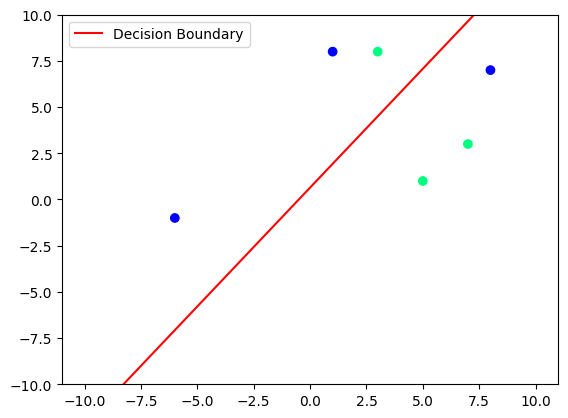

In [604]:
import numpy as np
from sklearn import svm


# Create and train SVM with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model
clf.fit(X, y)

# Extract the optimal weights and bias
weights = clf.coef_[0]
bias = clf.intercept_[0]

print(f"Weights: {weights}")
print(f"Bias: {bias}")

# plotting the decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, weights, bias):
    # Determine the slope and bias of the decision boundary
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

    # Plot the decision boundary
    x = np.linspace(-10, 10, 100)
    y = slope * x + intercept
    plt.plot(x, y, '-r', label='Decision Boundary')
    plt.ylim(-10, 10)
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, weights, bias)


In [605]:
# weight species W_1 , W_2 (set by looking at the num of features)
# bias species B

w_0_p = 1
w_0_n = 0
w_1_p = 1
w_1_n = 0
b_p = 0
b_n = 0
P_p = 0
P_n = 0
Q_p = 0
Q_n =0

# intermediates
w_0_p_x_p_0 = 0
w_1_p_x_p_1 = 0
w_0_n_x_n_0 = 0
w_1_n_x_n_1 = 0
w_0_p_x_n_0 = 0
w_0_n_x_p_0 = 0
w_1_p_x_n_1 = 0
w_1_n_x_p_1 = 0


w_0_p_arr = [w_0_p]
w_0_n_arr = [w_0_n]
w_1_p_arr = [w_1_p]
w_1_n_arr = [w_1_n]
b_p_arr = [b_p]
b_n_arr = [b_n]
P_p_arr = [P_p]
P_n_arr = [P_n]
Q_p_arr = [Q_p]
Q_n_arr = [Q_n]
loss_arr = [0]



time_index =0 


for t in range(epochs):
    time_start = t*time_step

    for i, x in enumerate(X):
        # defining species here as complexes
        x_p = X_p[i]
        x_p_0 = x_p[0]
        x_p_1 = x_p[1]

        x_n = X_n[i]
        x_n_0 = x_n[0]
        x_n_1 = x_n[1]

        y_p = Y_p[i]
        y_n = Y_n[i]

        x_p_0_y_p = product_wrapper(x_p_0, y_p, 0, time_start)
        x_p_1_y_p = product_wrapper(x_p_1, y_p, 0, time_start)
        x_n_0_y_n = product_wrapper(x_n_0, y_n, 0, time_start)
        x_n_1_y_n = product_wrapper(x_n_1, y_n, 0, time_start)
        x_p_0_y_n = product_wrapper(x_p_0, y_n, 0, time_start)
        x_p_1_y_n = product_wrapper(x_p_1, y_n, 0, time_start)
        x_n_0_y_p = product_wrapper(x_n_0, y_p, 0, time_start)
        x_n_1_y_p = product_wrapper(x_n_1, y_p, 0, time_start)

        # P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        w_0_p_x_p_0 = product_wrapper(w_0_p, x_p_0, w_0_p_x_p_0, time_start)
        w_1_p_x_p_1 = product_wrapper(w_1_p, x_p_1, w_1_p_x_p_1, time_start)
        w_0_n_x_n_0 = product_wrapper(w_0_n, x_n_0, w_0_n_x_n_0, time_start)
        w_1_n_x_n_1 = product_wrapper(w_1_n, x_n_1, w_1_n_x_n_1, time_start)
        P_p = sum_wrapper(w_0_p_x_p_0, w_1_p_x_p_1, P_p, time_start)
        P_p = sum_wrapper(P_p, w_0_n_x_n_0, P_p, time_start)
        P_p = sum_wrapper(P_p, w_1_n_x_n_1, P_p, time_start)
        P_p = sum_wrapper(P_p, b_n, P_p, time_start)
        
        # P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
        w_0_p_x_n_0 = product_wrapper(w_0_p, x_n_0, w_0_p_x_n_0, time_start)
        w_0_n_x_p_0 = product_wrapper(w_0_n, x_p_0, w_0_n_x_p_0, time_start)
        w_1_p_x_n_1 = product_wrapper(w_1_p, x_n_1, w_1_p_x_n_1, time_start)
        w_1_n_x_p_1 = product_wrapper(w_1_n, x_p_1, w_1_n_x_p_1, time_start)
        P_n = sum_wrapper(w_0_p_x_n_0, w_1_p_x_n_1, P_n, time_start)
        P_n = sum_wrapper(P_n, w_0_n_x_p_0, P_n, time_start)
        P_n = sum_wrapper(P_n, w_1_n_x_p_1, P_n, time_start)
        P_n = sum_wrapper(P_n, b_p, P_n, time_start)
        
        temp_1 = 1
        temp_1 = product_wrapper(y_p, P_p, temp_1, time_start)

        temp_2 = 1
        temp_2 = product_wrapper(y_n, P_n, temp_2, time_start)

        temp_3 = 1
        temp_3 = product_wrapper(y_p, P_n, temp_3, time_start)

        temp_4 = 1
        temp_4 = product_wrapper(y_n, P_p, temp_4, time_start)

        # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
        Q_p = sum_wrapper(temp_1, temp_2, Q_p, time_start)
        # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
        Q_n = sum_wrapper(temp_3, temp_4, Q_n, time_start)

        Q_n_t = 1
        Q_n_t = sum_wrapper(Q_n, 1, Q_n_t, time_start)

        const = lr * 2 * 1/epochs
        const_t = 0

        bgta = comparison_wrapper(Q_p, Q_n_t,0.5,time_start)

        # w_0_p = w_0_p + lr * (2 * 1/epochs * w_0_n) + lr * (x_p[0] * Y_p[i] + x_n[0] * Y_n[i]) * bgta
        const_1 = product_wrapper(w_0_n, const, const_t, time_start)
        w_0_p = sum_wrapper(w_0_p, const_1, w_0_p, time_start)
        const_2 = sum_wrapper(x_p_0_y_p, x_n_0_y_n, const_t, time_start)
        const_2 =product_wrapper(const_2, lr, const_t, time_start)
        const_2 = product_wrapper(const_2, bgta, const_2, time_start)
        w_0_p = sum_wrapper(w_0_p, const_2, w_0_p, time_start)

        # w_1_p = w_1_p + lr * (2 * 1/epochs * w_1_n) + lr * (x_p[1] * Y_p[i] + x_n[1] * Y_n[i]) * bgta
        const_3 = product_wrapper(w_1_n, const, const_t, time_start)
        w_1_p = sum_wrapper(w_1_p, const_3, w_1_p, time_start)  
        const_4 = sum_wrapper(x_p_1_y_p, x_n_1_y_n, const_t, time_start)
        const_4 =product_wrapper(const_4, lr, const_t, time_start)
        const_4 = product_wrapper(const_4, bgta, const_4, time_start)
        w_1_p = sum_wrapper(w_1_p, const_4, w_1_p, time_start)

        # w_0_n = w_0_n + lr * (2 * 1/epochs * w_0_p) + lr * (x_n[0] * Y_p[i] + x_p[0] * Y_n[i]) * bgta
        const_5 = product_wrapper(w_0_p, const, const_t, time_start)
        w_0_n = sum_wrapper(w_0_n, const_5, w_0_n, time_start)
        const_6 = sum_wrapper(x_n_0_y_p, x_p_0_y_n, const_t, time_start)
        const_6 =product_wrapper(const_6, lr, const_t, time_start)
        const_6 = product_wrapper(const_6, bgta, const_6, time_start)
        w_0_n = sum_wrapper(w_0_n, const_6, w_0_n, time_start)

        # w_1_n = w_1_n + lr * (2 * 1/epochs * w_1_p) + lr * (x_n[1] * Y_p[i] + x_p[1] * Y_n[i]) * bgta
        const_7 = product_wrapper(w_1_p, const, const_t, time_start)
        w_1_n = sum_wrapper(w_1_n, const_7, w_1_n, time_start)
        const_8 = sum_wrapper(x_n_1_y_p, x_p_1_y_n, const_t, time_start)
        const_8 =product_wrapper(const_8, lr, const_t, time_start)
        const_8 = product_wrapper(const_8, bgta, const_8, time_start)
        w_1_n = sum_wrapper(w_1_n, const_8, w_1_n, time_start)

        # b_p = b_p + lr * Y_n[i] * bgta
        # const_9 = product_wrapper(y_n, lr, const_t, time_start)
        # const_9 = product_wrapper(const_9, bgta, const_9, time_start)
        # b_p = sum_wrapper(b_p, const_9, b_p, time_start)

        # # b_n = b_n + lr * Y_p[i] * bgta
        # const_10 = product_wrapper(y_p, lr, const_t, time_start)
        # const_10 = product_wrapper(const_10, bgta, const_10, time_start)
        # b_n = sum_wrapper(b_n, const_10, b_n, time_start)
            
        
    w_0_p_arr.append(w_0_p)
    w_0_n_arr.append(w_0_n)
    w_1_p_arr.append(w_1_p)
    w_1_n_arr.append(w_1_n)
    b_p_arr.append(b_p)
    b_n_arr.append(b_n)
    P_p_arr.append(P_p)
    P_n_arr.append(P_n)
    Q_p_arr.append(Q_p)
    Q_n_arr.append(Q_n)

    # finding the loss on y

    # predicting

    y_result = []
    for i, x in enumerate(X):
        x_p = X_p[i]
        x_n = X_n[i]
        y_p = Y_p[i]
        y_n = Y_n[i]

        P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p

    # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
    # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
    
        if P_p - P_n >=0:
            y_result.append(1)
        else:
            y_result.append(-1)
    loss = 0
    for i in range(len(y)):
        if y[i] != y_result[i]:
            loss += 1
    loss_arr.append(loss)


    print(t, end='\r')


        

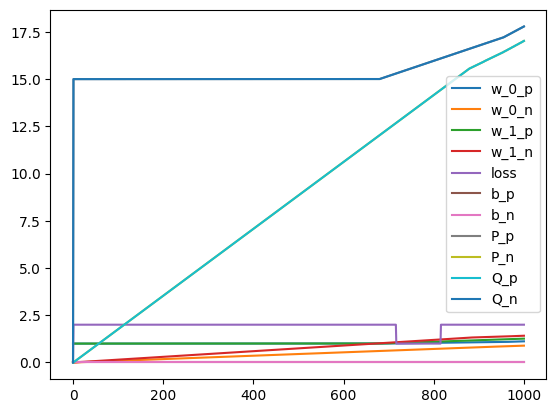

In [606]:
# plot the arrays
import matplotlib.pyplot as plt
plt.plot(w_0_p_arr, label = 'w_0_p')
plt.plot(w_0_n_arr, label = 'w_0_n')
plt.plot(w_1_p_arr, label = 'w_1_p')
plt.plot(w_1_n_arr, label = 'w_1_n')
plt.plot(loss_arr, label = 'loss')
plt.plot(b_p_arr, label = 'b_p')
plt.plot(b_n_arr, label = 'b_n')
plt.plot(P_p_arr, label = 'P_p')
plt.plot(P_n_arr, label = 'P_n')
plt.plot(Q_p_arr, label = 'Q_p')
plt.plot(Q_n_arr, label = 'Q_n')
plt.legend()
plt.show()

In [607]:
w_0 = w_0_p_arr[-1] - w_0_n_arr[-1]
w_1 = w_1_p_arr[-1] - w_1_n_arr[-1]
b = b_p_arr[-1] - b_n_arr[-1]
print(w_0, w_1, b)

0.22902008764898563 -0.15415582111188364 0


In [608]:
def net_calc(list1, list2):
    result = [a - b for a, b in zip(list1, list2)]

    return result

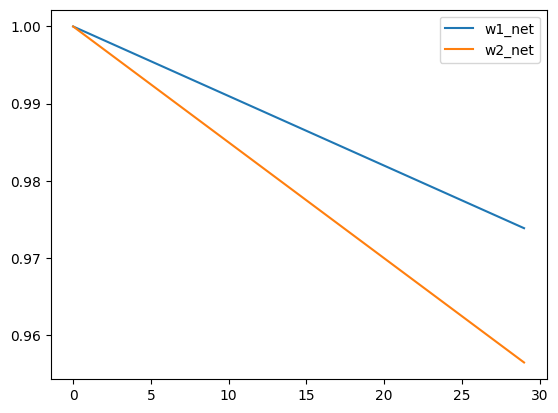

In [609]:
w1_net = net_calc(w_0_p_arr, w_0_n_arr)
w2_net = net_calc(w_1_p_arr, w_1_n_arr)
b_net = net_calc(b_p_arr, b_n_arr)

# plotting the net weights and bias
plt.plot(w1_net[:30], label = 'w1_net')
plt.plot(w2_net[:30], label = 'w2_net')
# plt.plot(b_net, label = 'b_net')
plt.legend()
plt.show()

In [610]:
print(w1_net[-1], w2_net[-1], b_net[-1])

0.22902008764898563 -0.15415582111188364 0


In [611]:
# predicting

test_result = []
for i, x in enumerate(X):
    x_p = X_p[i]
    x_n = X_n[i]
    y_p = Y_p[i]
    y_n = Y_n[i]
    

    P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
    P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
    print(P_p, P_n)

    Q_p = Y_p[i]* P_p + Y_n[i] * P_n
    Q_n = Y_p[i]* P_n + Y_n[i] * P_p
    print(Q_p, Q_n)

    if Q_p - Q_n >=1:
        test_result.append(0)
    else:
        test_result.append(1)
    
print(test_result)
  


11.211490987026226 12.21571746827231
12.21571746827231 11.211490987026226
13.450569844341388 13.9967561502895
13.450569844341388 13.9967561502895
6.859191088083988 5.868246470950943
6.859191088083988 5.868246470950943
6.758765811959539 7.978730516741569
7.978730516741569 6.758765811959539
11.621257834991312 10.480584684784063
11.621257834991312 10.480584684784063
17.786773042833214 17.033703089424513
17.033703089424513 17.786773042833214
[0, 1, 1, 0, 0, 1]


In [612]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Generate mock data (replace this with your actual data)
# w1 = net_calc(w_0_p_arr, w_0_n_arr)
# w2 = net_calc(w_1_p_arr, w_1_n_arr)
# weights_history =  [(w1[i], w2[i]) for i in range(len(w1))]
# bias_history = net_calc(b_p_arr, b_n_arr)

# num_frames = len(weights_history)


# # Set up the plot
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)

# points = X
# labels = y


# # Initialize scatter plot for points
# scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm')

# # Initialize line for hyperplane
# line, = ax.plot([], [], 'g-', lw=2)

# # Text for displaying current frame
# frame_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

# def init():
#     return scatter, line, frame_text

# def update(frame):
#     # Update hyperplane
#     print(frame, end='\r')
#     w1, w2 = weights_history[frame]
#     b = bias_history[frame]
    
#     x = np.array([-10, 10])
#     y = (-w1 * x - b) / w2
    
#     line.set_data(x, y)
    
#     # Update frame text
#     frame_text.set_text(f'Frame: {frame}')
    
#     return scatter, line, frame_text

# # Create animation
# anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

# plt.title("Hyperplane and Training Points Animation Case: "+ str(case) + " lr =" + str(lr) + " epochs = " + str(epochs))
# plt.show()

# # Uncomment the following line to save the animation as a gif
# title = "hyperplane_animation Case: " + str(case)  + "lr =" + str(lr) + " epochs = " + str(epochs) + ".mp4"
# anim.save(title, writer='ffmpeg', fps=30)

In [613]:
# issues
# time_Steps
# oscillations
# mutability
# use load wrapper, whenever species

In [614]:
# def osciallation(num_species, time_Duration = 1000):
#     O_t = np.zeros(num_species)
#     O_t[0] = 1
#     t = np.linspace(0, time_Duration, time_Duration+1)
#     dope = 10 ** (-5)
#     d_o_T = np.ones(num_species) * dope

#     y = []
#     y.extend(O_t)
#     y.extend(d_o_T)

#     def doped_model(y, t,  d_o_T):
#         O_t = y[:num_species]
#         d_o_T = y[num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt = []
#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t)

#         return dydt
    
#     O = odeint(doped_model, y, t, args=(d_o_T,))
#     return O


# sol = osciallation(3)

# # plotting the solution 
# import matplotlib.pyplot as plt
# plt.plot(sol)
# plt.legend(['O1', 'O2', 'O3'])
# plt.show()

In [615]:
# # custom function

# y_0 = [1,2,0,4,5]


# def custom_function_wrapper(y_0):
#     y = y_0

#     o1 = 1
#     o2 = 0
#     o3 = 0
#     o4 = 0
#     y.append(o1)
#     y.append(o2)
#     y.append(o3)
#     y.append(o4)

#     dope = 10 ** (-5)
#     d_o1 = dope
#     d_o2 = dope
#     d_o3 = dope
#     d_o4 = dope

#     y.append(d_o1)
#     y.append(d_o2)
#     y.append(d_o3)
#     y.append(d_o4)
    

#     t = np.linspace(0, 100, 101)
#     def custom_f(y,t):
#         dydt = []
#         dadt = 0
#         dbdt = 0
#         dcdt = y[0]*y[5] + y[1]*y[5] - y[2]*y[5]
#         dddt = 0
#         dedt = y[2]*y[3]*y[8] - y[4]*y[8]
#         dydt = [dadt, dbdt, dcdt, dddt, dedt]

#         # adding the oscillation part
#         num_species = 4
#         O_t = y[-2*num_species : -num_species]
#         d_o_T = y[-num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t) 

#         return dydt

#     sol = odeint(custom_f, y, t)
#     return sol

# # for i in range(100):
# #     sol = custom_function_wrapper(y_0)
# #     y_0 = sol[-1].tolist()

# # print(y_0)

# # print(sol)

# plt.plot(sol)
# plt.legend(['A' , 'B', 'C' , 'D' ,'E'])
# plt.show()

In [616]:
# a = sol[:, 0]
# b = sol[:, 1]
# c = sol[:, 2]
# d = sol[:, 3]
# e = sol[:, 4]

# print(len(a))

# for i in range(len(a)):
#     print(a[i], b[i], c[i], d[i], e[i])